# Part 1 - Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

In [2]:
dataset = pd.read_excel('End_time.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Charge_mass        576 non-null    float64
 1   Standoff_distance  576 non-null    int64  
 2   End_time           576 non-null    float64
 3   End_index          576 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.1 KB


In [3]:
y = dataset['End_time']*1000
X = dataset.drop(['End_time','End_index'], axis=1)
print(X.shape, y.shape)

(576, 2) (576,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units=20,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=15,
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=10,
                              activation='relu'))

In [9]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

In [11]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [12]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [13]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
14/14 [==============================] - 1s 33ms/step - loss: 5630.2744 - mae: 70.2142 - val_loss: 6505.5815 - val_mae: 75.8990
Epoch 2/500
14/14 [==============================] - 0s 7ms/step - loss: 5565.9707 - mae: 69.8244 - val_loss: 6333.1147 - val_mae: 74.9182
Epoch 3/500
14/14 [==============================] - 0s 8ms/step - loss: 5304.6826 - mae: 68.1807 - val_loss: 5905.6294 - val_mae: 72.3586
Epoch 4/500
14/14 [==============================] - 0s 12ms/step - loss: 4907.5244 - mae: 65.5935 - val_loss: 5419.1899 - val_mae: 69.3185
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 4466.3721 - mae: 62.5734 - val_loss: 4872.9019 - val_mae: 65.7081
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 3964.8496 - mae: 58.8993 - val_loss: 4244.6099 - val_mae: 61.2947
Epoch 7/500
14/14 [==============================] - 0s 8ms/step - loss: 3365.0107 - mae: 54.2178 - val_loss: 3479.6494 - val_mae: 55.4366
Epoch 8/500
14/14 [======

### Analyse learn history

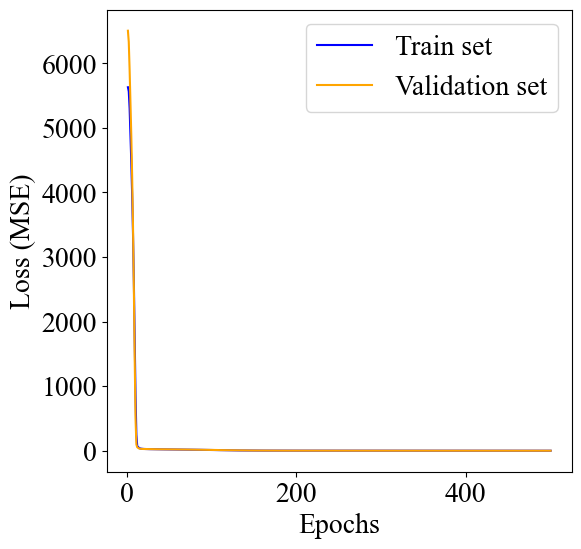

In [14]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)

# Set global font to Times New Roman and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values, 'blue', label='Train set')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set')
#plt.title('Training and testing loss')


plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('End_ANN3_2.png', dpi=200, bbox_inches='tight')
plt.show()

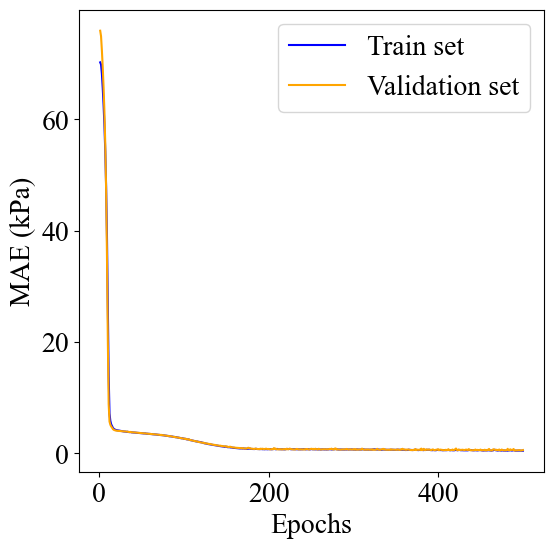

In [15]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
# Create a plot
plt.figure(figsize=(6, 6))
plt.plot(epochs, loss_values1, 'blue', label='Train set')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE (kPa)')
plt.legend()
plt.savefig('End_ANN3_3.png', dpi=200, bbox_inches='tight')
plt.show()

In [16]:
ann.save('End_ANN_3')

INFO:tensorflow:Assets written to: End_ANN_3\assets


# Part 4 - Make predictions

3/3 [==============================] - 0s 5ms/step


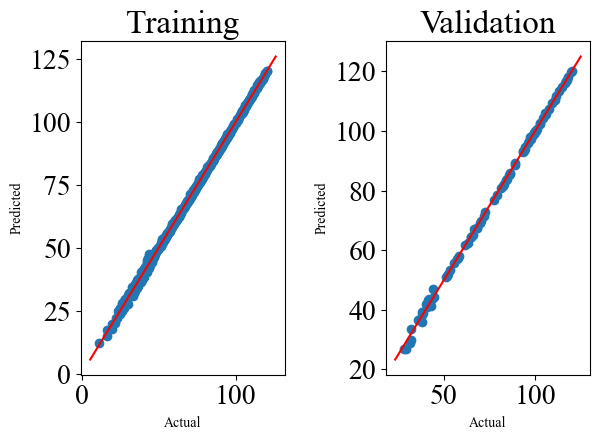

In [17]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()
plt.savefig('End_ANN3_1.png', dpi=200, bbox_inches='tight')
# show the plot
plt.show()

In [18]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 [==============================] - 0s 3ms/step
[[ 99.6   99.7 ]
 [ 67.2   67.63]
 [100.18 100.6 ]
 [ 31.97  30.98]
 [ 43.38  43.74]
 [ 59.35  59.22]
 [105.53 105.24]
 [ 88.94  89.5 ]
 [ 38.73  37.9 ]
 [105.79 105.34]
 [ 62.    62.56]
 [ 57.34  57.68]
 [ 65.33  65.19]
 [110.42 110.25]
 [ 91.21  91.62]
 [ 37.33  36.9 ]
 [ 77.79  78.37]
 [ 45.58  45.98]
 [ 89.21  88.35]
 [ 60.78  60.89]
 [ 30.49  29.33]
 [ 29.53  28.5 ]
 [ 95.22  95.12]
 [117.08 117.43]
 [ 23.67  22.53]
 [ 75.75  76.11]
 [ 39.81  41.77]
 [ 40.63  39.43]
 [110.79 111.16]
 [102.18 102.58]
 [ 62.4   62.53]
 [ 68.68  69.29]
 [ 42.56  42.6 ]
 [ 84.91  84.38]
 [ 51.65  52.27]
 [ 97.59  97.76]
 [ 98.22  98.62]
 [ 56.17  56.63]
 [ 50.41  50.93]
 [ 39.53  39.78]
 [ 86.09  86.36]
 [ 99.36  99.73]
 [ 68.43  68.98]
 [ 71.15  71.55]
 [ 63.69  64.06]
 [ 61.93  62.45]
 [ 66.41  66.9 ]
 [ 47.1   46.37]
 [ 80.16  80.48]
 [ 87.63  87.65]
 [ 43.26  42.73]
 [ 39.36  38.42]
 [ 35.28  37.21]
 [ 96.84  96.37]
 [ 52.52  52.77]
 [120.   119.8

Text(0, 0.5, 'Predicted data')

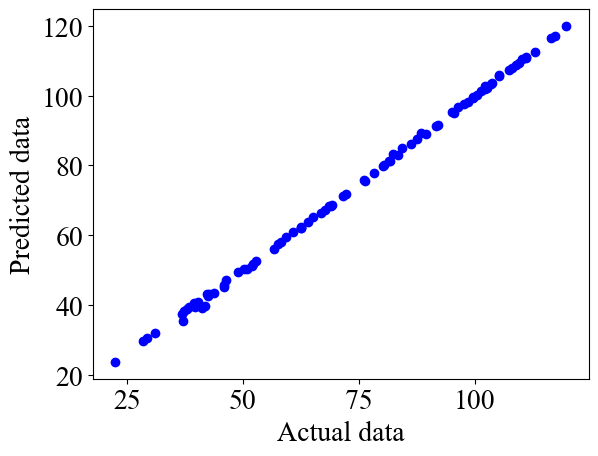

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

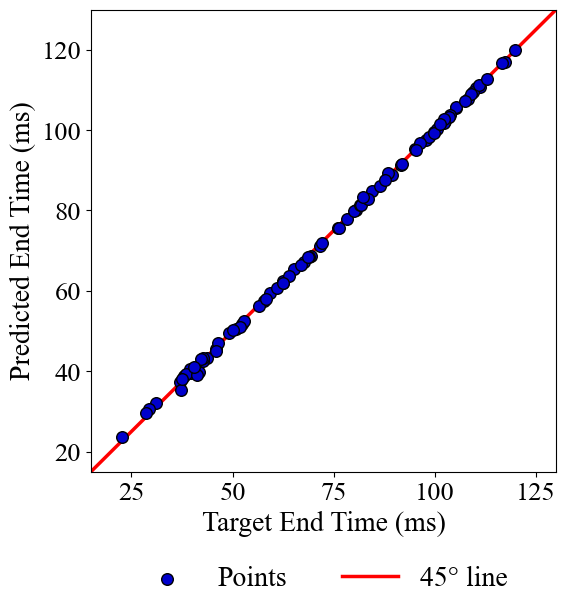

In [20]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

b_l = 15
u_l = 130

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted End Time (ms)')
plt.xlabel('Target End Time (ms)')
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, frameon = False, fontsize = 20)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red

plt.savefig('End_ANN3.png', dpi=200, bbox_inches='tight')

In [21]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

13/13 [==============================] - 0s 2ms/step
0.4914517535025888
0.49032153517002286


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9994458995332047


In [23]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9993168661230226


In [24]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 97.70%
Within 10% margin 100.00%
Within 20% margin 100.00%
Out of 20% margin 0.00%


In [25]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9994327066649477


In [26]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

0.6266698554601289

In [27]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.49032153517002286